<a href="https://colab.research.google.com/github/SinghAbh1shek/statistics/blob/main/05_Central_Limit_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel("/content/fraud_data_lyst1751134022071.xlsx")
data

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-04-01 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14441,22-01-2019 00:37,Hudson-Grady,shopping_pos,122.00,Athena,OR,45.8289,-118.4971,1302,Dealer,18-10-1976,699a4c06b22711bf3e0d8ef91232d356,46.442439,-118.524214,0
14442,22-01-2019 00:41,"""Nienow, Ankunding and Collie""",misc_pos,9.07,Gardiner,OR,43.7857,-124.1437,260,"""Engineer, maintenance""",1956-01-09 00:00:00,080d620d24815c7d6c637cf0b71dde8e,42.901265,-124.995317,0
14443,22-01-2019 00:42,Pacocha-O'Reilly,grocery_pos,104.84,Alva,WY,44.6873,-104.4414,110,"""Administrator, local government""",16-05-1973,3c346c8cd627c5fe3ed57430db2e9ae7,45.538062,-104.542117,0
14444,22-01-2019 00:48,"""Bins, Balistreri and Beatty""",shopping_pos,268.16,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,e66ffcc95ba7fc490486242af1205d04,64.081462,-165.898698,0


In [ ]:
data.shape

(14446, 15)

In [ ]:
population_mean = data['amt'].mean()
print("Population Mean: ", population_mean)

Population Mean:  124.43007337671327


Sample Mean


In [ ]:
sample = data['amt'].sample(n=1000, random_state=42)
sample_mean = sample.mean()
print("Sample Mean: ", sample_mean)

Sample Mean:  119.54582999999998


Impact of sample size on sample mean: As the sample size increases, the sample mean becomes a better estimator of the population mean.

This is the one of the key ideas of the Central Limit Theorem.

In [ ]:
sample_sizes = [10, 50, 100, 500, 5000, 7000]
sample_means = [data["amt"].sample(n=size, random_state=42).mean() for size in sample_sizes]
for size, mean in zip(sample_sizes, sample_means):
  print(f"Sample Size: {size}, Sample Mean: {mean}")

Sample Size: 10, Sample Mean: 96.85499999999999
Sample Size: 50, Sample Mean: 88.3492
Sample Size: 100, Sample Mean: 81.8355
Sample Size: 500, Sample Mean: 112.06866000000001
Sample Size: 5000, Sample Mean: 123.99536800000001
Sample Size: 7000, Sample Mean: 126.52721


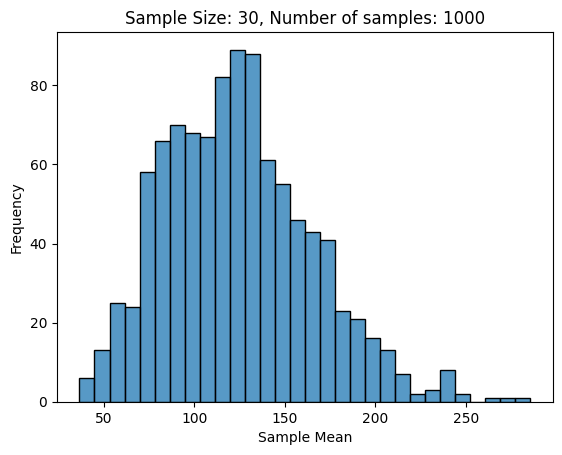

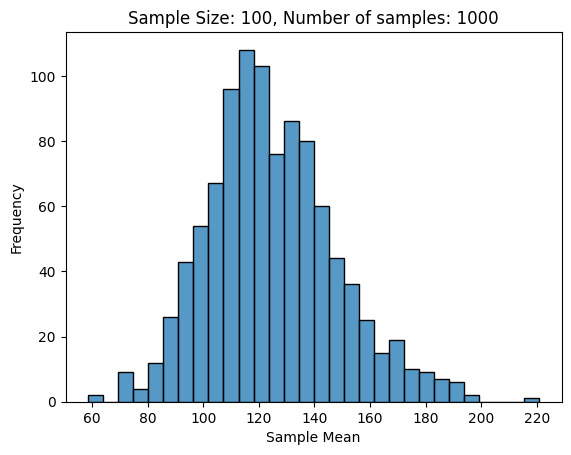

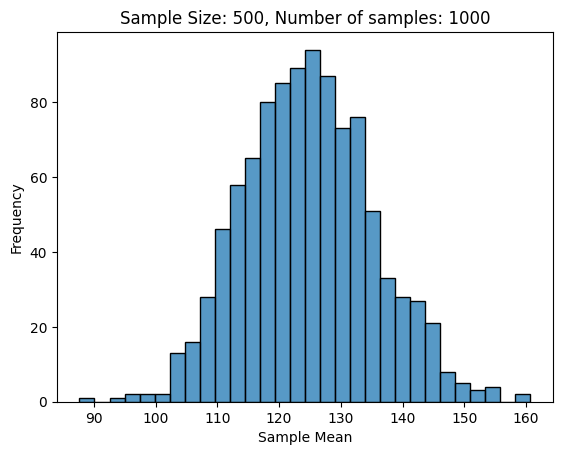

In [ ]:
#  Function Definition

def visualize_clt(data, sample_size, num_samples):
  sample_means = [np.mean(np.random.choice(data, size=sample_size)) for _  in range(num_samples)]
  sns.histplot(sample_means, bins = 30, edgecolor='black')
  plt.title(f"Sample Size: {sample_size}, Number of samples: {num_samples}")
  plt.xlabel('Sample Mean')
  plt.ylabel('Frequency')
  plt.show()

visualize_clt(data['amt'], 30, 1000)
visualize_clt(data['amt'], 100, 1000)
visualize_clt(data['amt'], 500, 1000)

Difference Between sample mean vs sampling distribution mean

sample mean: The mean of a single sample

sample distribution mean; the mean of all the possible sample means which approximates to the population means.

In [ ]:
sample_means_distribution = [np.mean(np.random.choice(data['amt'], size=100)) for _  in range(1000)]
sample_means_distribution

[np.float64(145.3492),
 np.float64(122.9261),
 np.float64(106.42279999999997),
 np.float64(115.76719999999999),
 np.float64(105.46940000000001),
 np.float64(120.35290000000003),
 np.float64(110.01700000000001),
 np.float64(102.07429999999998),
 np.float64(117.04989999999997),
 np.float64(128.9809),
 np.float64(138.466),
 np.float64(135.3343),
 np.float64(92.93450000000003),
 np.float64(191.73289999999994),
 np.float64(104.91809999999998),
 np.float64(84.56330000000001),
 np.float64(108.77359999999999),
 np.float64(142.3889),
 np.float64(123.6962),
 np.float64(150.72930000000002),
 np.float64(139.0349),
 np.float64(81.93519999999998),
 np.float64(112.13690000000001),
 np.float64(117.38799999999999),
 np.float64(113.7782),
 np.float64(112.2275),
 np.float64(95.81119999999999),
 np.float64(76.34270000000001),
 np.float64(104.24620000000003),
 np.float64(133.4866),
 np.float64(91.18850000000002),
 np.float64(139.27169999999998),
 np.float64(166.8834),
 np.float64(126.59190000000002),
 np.f

In [ ]:
sample_distribution_mean = np.mean(sample_means_distribution)
sample_distribution_mean

np.float64(123.71274789999998)

In [ ]:
print(population_mean)

124.43007337671327


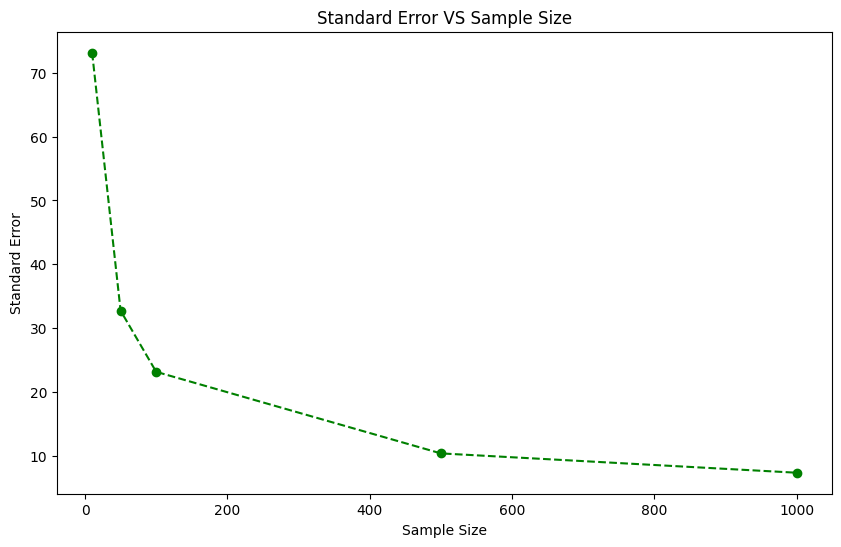

In [ ]:
population_std = data['amt'].std()
sample_sizes = [10, 50, 100, 500, 1000,]

standard_error = [population_std/np.sqrt(sample_size) for sample_size in sample_sizes]
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, standard_error, linestyle='--', marker='o', color='g')
plt.title('Standard Error VS Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Standard Error')
plt.show()